# Misc

Various plots for nrphypy

Mark Disterhof, mardis@uni-bremen.de

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import tikzplotlib

from nrphypy import signals, ssb, decode, threegpp_tdl_channels

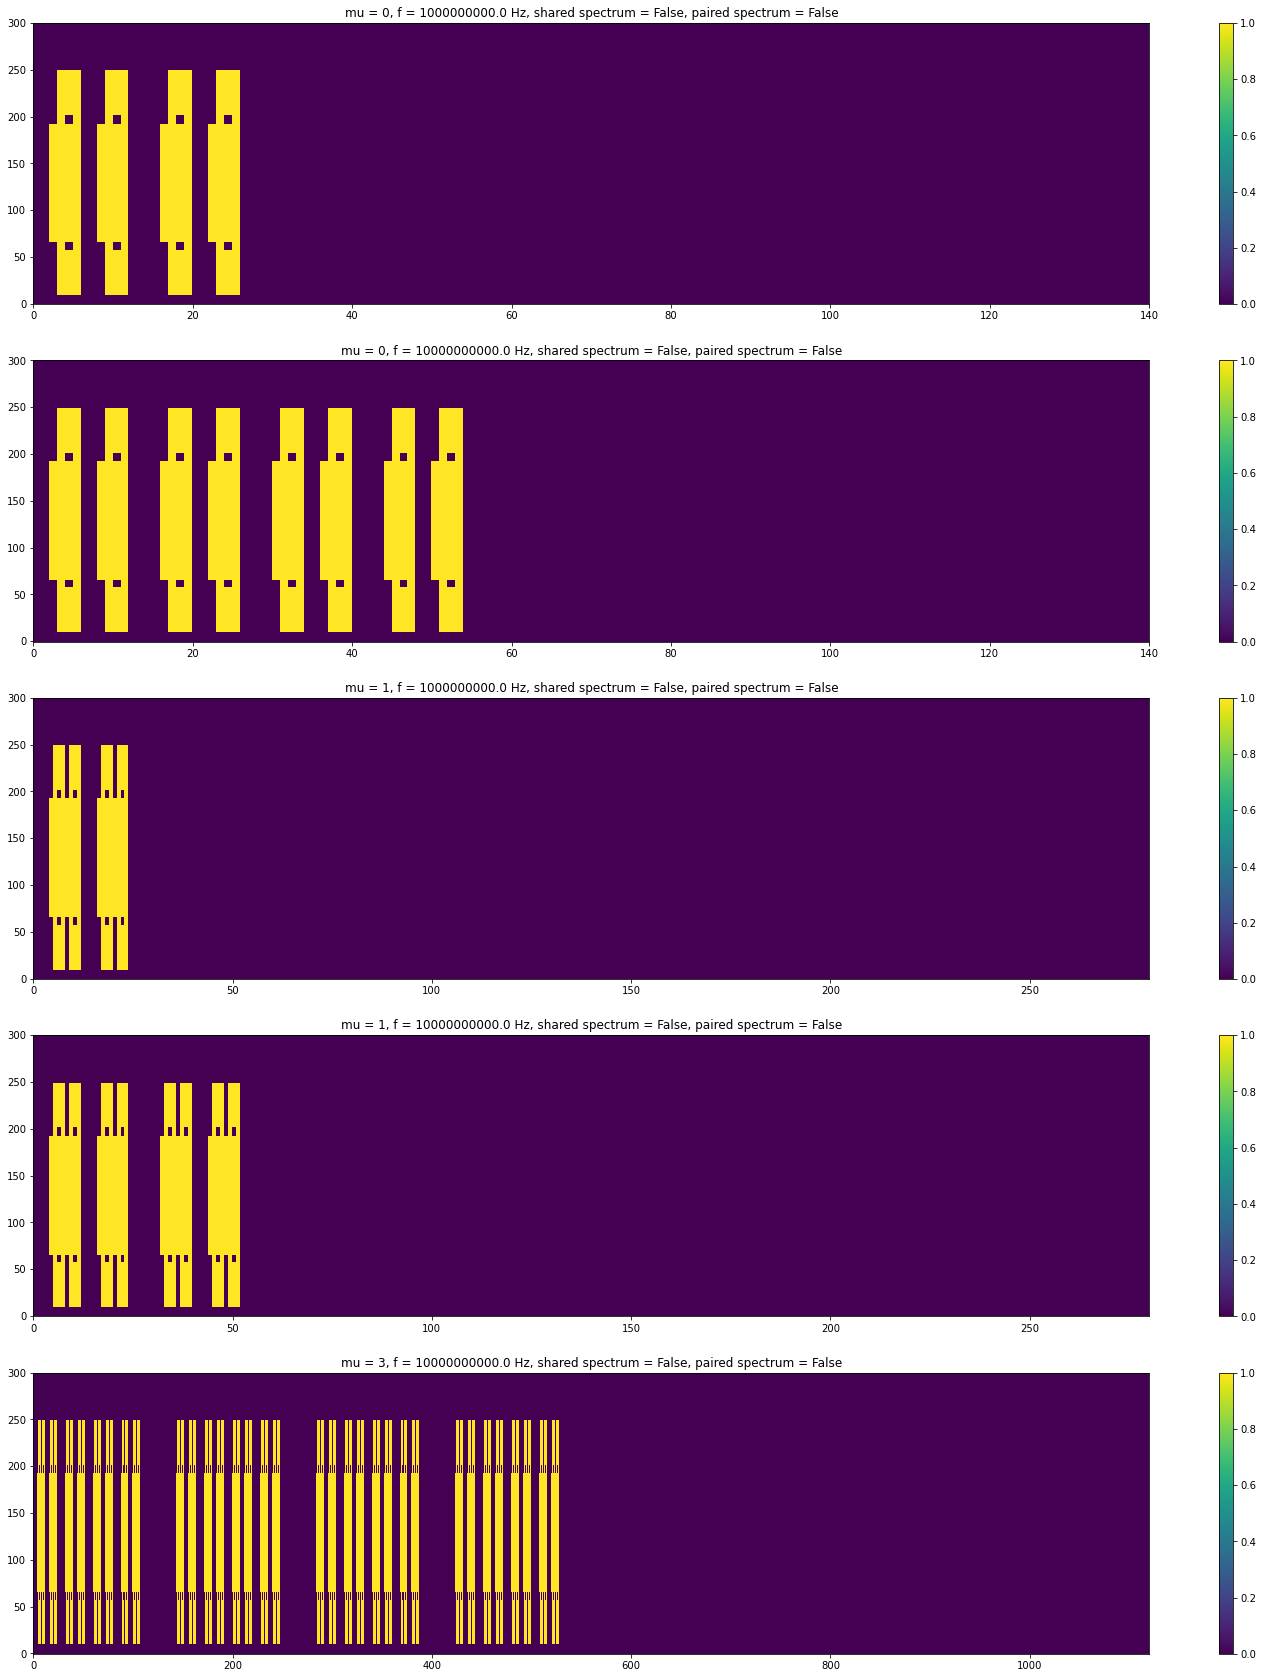

In [4]:
N_ID1 = 123
N_ID2 = 0
N_ID_Cell = 3 * N_ID1 + N_ID2  # cell identity ID

k_ssb = 10

av_mu = [0,1,3] #[0,1,3,4]
av_f = [1e9, 10e9] # representatives for FR1 and FR2
av_sharedspectrum = [False] #[True, False]
av_pairedspectrum = [False]#[True, False]

av_configs = [[i,j,k,l] for i in av_mu for j in av_f for k in av_sharedspectrum for l in av_pairedspectrum]
av_configs = [x for x in av_configs if ssb.get_ssb_candidate_idx(*x).size] # Filter permutations which are not allowed (FR2)

fig, ax = plt.subplots(figsize=(25,30), nrows= len(av_configs))
ax = np.array(ax)
for i, conf in enumerate(av_configs):
    rgrid = ssb.grid(300, N_ID1, N_ID2, k_ssb, *conf,)
    ax[i].set_title('mu = {}, f = {} Hz, shared spectrum = {}, paired spectrum = {}'.format(*conf))
    ax[i].pcolormesh(
        np.array(range(len(rgrid[0]))) + 0.5, 
        range(len(rgrid)), 
        np.abs(rgrid), 
        shading='auto')
    plt.colorbar(ax[i].pcolor(np.abs(rgrid)), ax=ax[i])


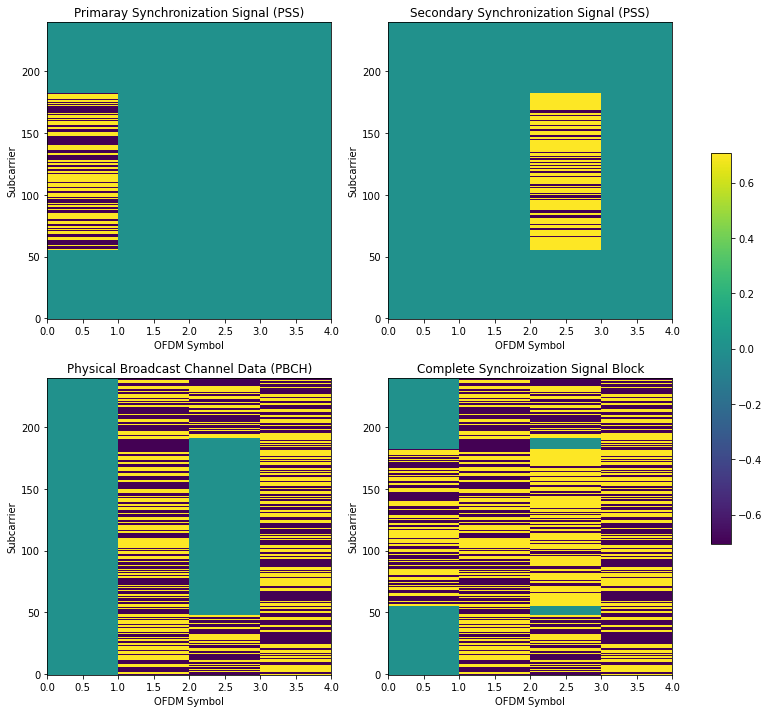

In [10]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(figsize=(14,12), ncols = 2, nrows=2)

N_ID1 = 123
N_ID2 = 0
N_ID_Cell = 3 * N_ID1 + N_ID2  # cell identity 
nu = N_ID_Cell % 4
 
pss = signals.pss(N_ID2)
rgrid_pss = ssb.map_pss(pss)

sss =  signals.sss(
        N_ID1 = N_ID1,
        N_ID2 = N_ID2)

rgrid_sss = ssb.map_sss(sss)

pbch= signals.pbch(
        np.random.randint(2, size=864),
        len(ssb.get_ssb_candidate_idx(0, 1e9, False, False)),
        N_ID_Cell,
        0)

dmrs = signals.dmrs(0, N_ID_Cell, len(ssb.get_ssb_candidate_idx(0, 1e9, False, False)), 0)


rgrid_pbch = ssb.map_pbch(pbch, dmrs, nu)

rgrid = rgrid_pss + rgrid_sss + rgrid_pbch

im = ax1.pcolormesh(np.array(range(len(rgrid_pss[0]))) + 0.5, range(len(rgrid_pss)), np.real(rgrid_pss), shading='auto')
ax1.set_title('Primaray Synchronization Signal (PSS)')
ax1.set_xlabel('OFDM Symbol')
ax1.set_ylabel('Subcarrier')


ax2.pcolormesh(np.array(range(len(rgrid_sss[0]))) + 0.5, range(len(rgrid_sss)), np.real(rgrid_sss), shading='auto')
ax2.set_title('Secondary Synchronization Signal (PSS)')
ax2.set_xlabel('OFDM Symbol')
ax2.set_ylabel('Subcarrier')

ax3.pcolormesh(np.array(range(len(rgrid_pbch[0]))) + 0.5, range(len(rgrid_pbch)), np.real(rgrid_pbch), shading='auto')
ax3.set_title('Physical Broadcast Channel Data (PBCH)')
ax3.set_xlabel('OFDM Symbol')
ax3.set_ylabel('Subcarrier')


ax4.pcolormesh(np.array(range(len(rgrid[0]))) + 0.5, range(len(rgrid)), np.real(rgrid), shading='auto')
ax4.set_title('Complete Synchroization Signal Block')
ax4.set_xlabel('OFDM Symbol')
ax4.set_ylabel('Subcarrier')

_ = fig.colorbar(im, ax=[[ax1, ax2],[ax3, ax4]], shrink=0.6)#

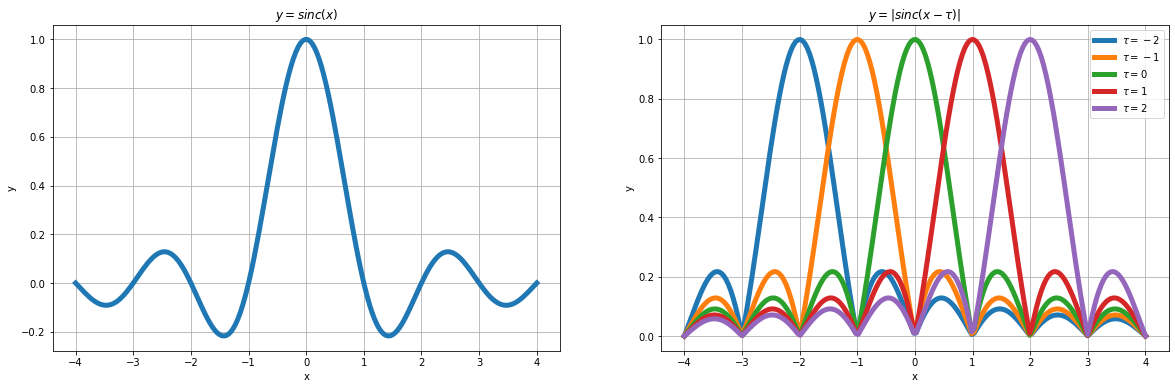

In [13]:
plt.rcParams['axes.grid'] = True
import tikzplotlib
fig, [ax1, ax2] = plt.subplots(figsize=(20,6), ncols = 2, nrows=1)

x = np.linspace(-4.,4.001,200)
y = np.array([[np.sin(np.pi*(x_i-tau))/np.pi/(x_i-tau) for x_i in x]for tau in range(-2,3,1)])
im = ax1.plot(x,y[len(y)//2], linewidth=5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(r'$y = sinc(x)$')

im = [ax2.plot(x,np.abs(y_i), linewidth=5) for y_i in y]
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(r'$y = |sinc(x - \tau)|$')
ax2.legend(np.array(im).flatten(), [r'$\tau = -2$',r'$\tau = -1$',r'$\tau =  0$',r'$\tau =  1$',r'$\tau =  2$'])
#tikzplotlib.save("./im/sinc.tikz")
fig.savefig("./im/sinc.pdf")


In [2]:
plt.rcParams['axes.grid'] = False
fig, ax1 = plt.subplots()
rgrid = ssb.grid(300, 0, 123, 10, 0,10e9)[:,:80]

ax1.pcolormesh(
        np.array(range(len(rgrid[0]))) + 0.5, 
        range(len(rgrid)), 
        np.abs(rgrid), 
        shading='auto',rasterized=True)
plt.colorbar(ax1.pcolor(np.abs(rgrid)), ax=ax1)
ax1.set_title('SS Burst')
ax1.set_xlabel('OFDM Symbol')
ax1.set_ylabel('Subcarrier')
fig.savefig("./im/ssburst.pdf", dpi=50)

NameError: name 'plt' is not defined

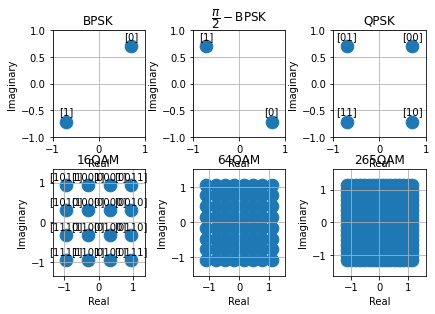

In [145]:
from pyphysim.util.misc import level2bits
from pyphysim.util.conversion import gray2binary

from pyphysim.modulators.fundamental import PSK,QAM
def plotConstellation(m, ax):  # pragma: no cover
        """taken from 
        https://pyphysim.readthedocs.io/en/latest/_modules/pyphysim/modulators/fundamental.html#Modulator.plotConstellation.
        """
        ax.scatter(m.symbols.real, m.symbols.imag, s =160)
        
        mi = np.sqrt(2)*np.min([m.symbols.real,m.symbols.imag])
        ma = np.sqrt(2)*np.max([m.symbols.real,m.symbols.imag])
        ax.set_xlim((1*mi,1*ma))
        ax.set_ylim((1*mi,1*ma))

        ax.grid()

        formatString = "[{0:0=" + str(level2bits(m._M)) + "b}]"

        index = 0
        if not len(m.symbols) > 4:
            for symbol in m.symbols:
                ax.text(
                    symbol.real,  # Coordinate X
                    symbol.imag + 0.09,  # Coordinate Y
                    formatString.format(index, format_spec="0"),  # Text
                    verticalalignment='bottom',  # From now on, text properties
                    horizontalalignment='center')
                index += 1
                
        elif len(m.symbols) == 16:
            
            for symbol in m.symbols:
                ax.text(
                    symbol.real,  # Coordinate X
                    symbol.imag + 0.09,  # Coordinate Y
                    formatString.format([11,9,1,3,2,0,8,10,14,12,4,6,7,5,13,15][gray2binary(index)], format_spec="0"),  # Text
                    verticalalignment='bottom',  # From now on, text properties
                    horizontalalignment='center')
                index += 1

        return ax

fig, [[ax01, ax02, ax03],[ax11, ax12, ax13]] = plt.subplots(ncols = 3, nrows=2)

fig.tight_layout()
plotConstellation(PSK(2,np.pi/4),ax01)
ax01.set_title('BPSK')

plotConstellation(PSK(2,-1*np.pi/4),ax02)
ax02.set_title('$\dfrac{\pi}{2}-$BPSK')

plotConstellation(PSK(4,np.pi/4),ax03)
ax03.set_title('QPSK')

plotConstellation(QAM(16),ax11)
ax11.set_title('16QAM')

plotConstellation(QAM(64),ax12)
ax12.set_title('64QAM')

plotConstellation(QAM(256),ax13)
ax13.set_title('265QAM')

for a in [ax01, ax02, ax03, ax11, ax12, ax13]:
    a.set_xlabel('Real')
    a.set_ylabel('Imaginary')
    
#fig.savefig("./im/constellations.pdf")
tikzplotlib.save("./im/constellations.tikz")